# Chapter 2 Force Vectors

## Section 2.1 Scalars and Vectors
* Scalar - any positive or negative physical quantity that can be completely specifeid by its magnitude.
* Vector - any physical quantity that requires both a magnitude and direction.


## Section 2.2 Vector Operations
* Multiplication and Division of a Vector by a Scalar - when a vector is multiplied or divided by a positive scalar its magnitude increases or decreases by that amount, if it is multiplied or divided by a negative scalar it will also change directions.
* Vector Addition - $\vec R = \vec A + \vec B$ , $\vec R$ is the resultant vector, $\vec A$ and $\vec B$ are the component vectors
* Vector Subtraction - $\vec R = \vec A - \vec B =  \vec A + (-\vec B)$

## Section 2.3 Vector Addition of Forces
* Resultant Force - addition of two component forces, $\vec F_R = \vec F_1 + \vec F_2$
* Finding the Components of a Force - $\vec F = \vec F_u + \vec F_v$ u and v are axes
* Addition of Multiple Forces - $\vec F_R = \vec F_1 + \vec F_2 + \vec F_3 = (\vec F_1 + \vec F_2) + \vec F_3$



## Problem 20
Determine the design angle $\theta (0^\circ \leq \phi \leq 90^\circ)$
between struts $AB$ and $AC$ so that the 400-lb horizontal
force has a component of 600 lb which acts up to the left, in
the same direction as from $B$ towards $A$. Take $\theta = 30^\circ$
<img src="pictures\problem_2_20.png" width="512"/>

In [43]:
import pysketcher as ps
from pysketcher.backend.matplotlib import MatplotlibBackend
import numpy as np
import matplotlib.pyplot as plt
strut_length = 12
wall_length = .9 * strut_length
theta = np.radians(30)

figure = ps.Figure(-2 * wall_length, .2 * wall_length, -.2 * wall_length, 2.2 * wall_length,MatplotlibBackend)
origin = ps.Point(0,0)
A = ps.Point(-strut_length * np.cos(theta),strut_length * np.sin(theta) + 0.6 * wall_length)
B = ps.Point(0,.6 * wall_length)
C = ps.Point(-.8 * wall_length,0)
symbols = {'A': A,
           'B': B,
           'C': C
           }
plt.text(-0.5 * wall_length, 0.5 * wall_length, 'test')
dots = (A,B,C)
for dot in dots:
    circle = ps.Circle(dot,0.05 * wall_length)
    circle.set_fill_pattern('-')
    figure.add(circle)
for symbol,point in symbols.items():
    figure.add(ps.Text(symbol,ps.Point(point.x + 0.1 * wall_length, point.y)))
objects = [
ps.Line(origin,ps.Point(0,wall_length)) ,
ps.Line(origin,ps.Point(-wall_length,0)),
ps.Line(A,B),
ps.Line(A,C)
]
forces = [
    ps.Force('400 lb',A,ps.Point(A.x-.4 * wall_length,A.y)),
    ps.Force('600 lb',A,ps.Point(A.x - .6 * (B.x-A.x),A.y - .6 * (B.y-A.y)))
]
for force in forces:
    figure.add(force)
for object in objects:
    figure.add(object)

figure.show()

ModuleNotFoundError: No module named 'pysketcher'

In [ ]:
import numpy as np
theta = np.radians(30)
force = 600
force_x = 400
phi = -theta + np.arccos(force_x/force)
print(f' \u03C6 =  {np.degrees(phi):.1f}\u00B0')

## Section 2.4 Addition of a System of Coplanar Forces
* Rectangular Components of a force - $\vec F = \vec F_x + \vec F_y$, $F_x =  F cos(\theta) $, $ F_y =  F sin(\theta)$
* Cartesian Vector Notation - $\vec F = F_x \vec i + F_y \vec j$

## Problem 41
Determine the magnitude of the resultant force
and its direction, measured counterclockwise from the
positive x axis.
<img src="pictures\problem_2_41.png" width="512"/>

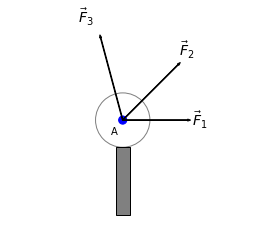

In [25]:
import numpy as np
from matplotlib.patches import FancyArrow, Rectangle, Circle
import matplotlib.pyplot as plt
figure, axes = plt.subplots()

hook_length = 5
hook_thickness = 1
circle_radius = 2
theta = np.radians(45)
alpha = np.radians(45+60)

hook_stem = Rectangle((0,0),hook_thickness,hook_length,edgecolor='black',facecolor='gray')
dot = Circle((1/2 * hook_thickness,hook_length + circle_radius), radius=.3, fill=True, color='blue')
hook = Circle((1/2 * hook_thickness,hook_length +  circle_radius), radius=2, fill=False, color='gray')
plt.text(-1/8 * hook_thickness,hook_length + 1.1 * hook_thickness,'A',va='center',ha='center')

axes.add_patch(dot)
axes.add_patch(hook)
axes.add_patch(hook_stem)

vectors = {
    'F_1': {'origin': np.array([1/2 * hook_thickness,hook_length + circle_radius]), 'vector': np.array([hook_length,0])},
    'F_2': {'origin': np.array([1/2 * hook_thickness,hook_length + circle_radius]), 'vector': np.array([1.2 * hook_length * np.cos(theta),1.2 * hook_length * np.sin(theta)])},
    'F_3': {'origin': np.array([1/2 * hook_thickness,hook_length + circle_radius]), 'vector': np.array([1.3 * hook_length * np.cos(alpha),1.3 * hook_length * np.sin(alpha)])},
}
axes.set_xlim([-hook_length - 3 * hook_thickness, 2 * hook_length])
axes.set_ylim([-hook_thickness,3 * hook_length])
for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.05,length_includes_head=True, color='k')
    axes.text(origin[0] + 1.25 * vector[0],
              origin[1] + 1.2 * vector[1],
              r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
              va='center',ha='right'
                              )
    axes.add_patch(vector_arrow)
axes.set_aspect('equal')
axes.axis('off')
plt.show()

In [ ]:
import numpy as np
force_1_x = 4 * 1000
force_2_x = 5 * 1000 * np.cos(np.radians(45))
force_3_x = -8 * 1000 * np.sin(np.radians(15))
force_x = force_1_x + force_2_x + force_3_x
force_1_y = 0
force_2_y = 5 * 1000 * np.sin(np.radians(45))
force_3_y = 8 * 1000 * np.cos(np.radians(15))
force_y = force_1_y + force_2_y + force_3_y
print(f'F_R = {force_x:.1f}i\u0302 + {force_y:.1f}j\u0302')
print(f'|F_R| = {np.sqrt(force_x**2+force_y**2):.1f} N')
print(f'\u03B8 = {np.degrees(np.arctan(force_y/force_x)):.1f}\u00B0')

## Section 2.5 Cartesian Vectors
* Right-Handed Coordinate System - thumb points in positive z direction, fingers curled about z axis and directed from the positive x-axis to the y-axis
* Cartesian Vector Form -$\vec A = A_x \vec i + A_y \vec j + A_z \vec k$
* Magnitude of Cartesian Vector - Magnitude of $\vec A$ = A = $\sqrt{A_x^2 + A_y^2 + A_z^2} $
* Coordinate Direction Angles - $\alpha, \beta, \gamma$; $cos\alpha = {A_x \over A}$, $cos\beta = {A_y \over A}$, $cos\gamma = {A_z \over A}$
* $\vec u_A = cos \alpha \vec i + cos \beta \vec j + cos \gamma \vec k$
* $ cos^2 \alpha \vec i + cos^2 \beta \vec j + cos^2 \gamma \vec k = 1$
* Transverse and Azmuth Angles - $\theta$ and $\phi$ respectively, $A_x = A sin \phi cos \theta$, $A_y = A sin \phi sin \theta$ $A_z = A cos \phi$
* $\vec A = A sin \phi cos\theta \vec i + A sin \phi sin \theta \vec j + A cos \phi \vec k$

## Section 2.6 Addition of Cartesian Vectors
* $\vec R = \vec A + \vec B = (A_x + B_x) \vec i + (A_y + B_y) \vec j + (A_z + B_z) \vec k$
* $\vec F_R = \sum \vec F = \sum F_x \vec i + \sum F_y \vec j + \sum F_z \vec k$

## Problem 78
The two forces $\vec F_1$ and $\vec F_2$ acting at $A$ have a resultant
force of $\vec F_R = {-100 \vec k}$ lb. Determine the magnitude and
coordinate direction angles of $\vec F_2$.
<img src="pictures\problem_2_78.png" width="512"/>

In [44]:

force_1_x = 60 * np.cos(np.radians(50)) * -np.cos(np.radians(30))
force_1_y = 60 * np.cos(np.radians(50)) * np.sin(np.radians(30))
force_1_z = 60 * np.sin(np.radians(-50))
force_1 = np.array((force_1_x,force_1_y,force_1_z))
# force_R = force_1 + force_2
force_R = np.array((0,0,-100))
force_2 = force_R - force_1
magnitude_force_2 = np.sqrt((force_2[0]**2 + force_2[1]**2 + force_2[2]**2))
#print(np.linalg.norm(force_2))
print(f' {"magnitude of F_2":25} = {magnitude_force_2:5.1f} lb')
angle_alpha = np.degrees(np.arccos((force_2[0]/magnitude_force_2)))
print(f' {"angle alpha":25} = {angle_alpha:5.1f}\u00B0')
angle_beta = np.degrees((np.arccos(force_2[1]/magnitude_force_2)))
print(f' {"angle beta":25} = {angle_beta:5.1f}\u00B0')
angle_gamma = np.degrees((np.arccos(force_2[2]/magnitude_force_2)))
print(f' {"angle gamma":25} = {angle_gamma:5.1f}\u00B0')


 magnitude of F_2          =  66.4 lb
 angle alpha               =  59.8°
 angle beta                = 106.9°
 angle gamma               = 144.5°


## Section 2.7 Position Vectors
* Position Vector - A fixed vector which locates a point in space relative to another point, denoted $\vec{r}$, $\vec r = x \hat{\imath} + y \hat{\jmath} + z \hat {k}$

## Section 2.8 Vector Directed Along a Line
* Unit Vector $(\vec u)$ - $\vec F = F \vec u = F \frac{\vec r}{r}  = F$$  (x_B - x_A) \vec i + (y_B - y_A) \vec j + (z_B - z_A) \vec k \over \sqrt{(x_B-x_A)^2 + (y_B - y_A)^2 + (z_B - z_A)^2}$
* $\vec F$ has units of force, $\vec r$ has units of length
* A force $\vec F$ acting in the direction of a position vector $\vec r$ can be represented in Cartesian form if the unit vector $\vec u$ if the position vector is determined, and it is multiplied by the magnitude of the force , $\vec F = F \vec u = F {\vec r \over r}$

## Problem 95
The plate is suspended using the three cables which
exert the forces shown. Express each force as a Cartesian
vector.
<img src="pictures\problem_2_95.png" width="512"/>

In [45]:
force_BA = np.round((350 * np.array((-5,6,14))/np.sqrt((-5)**2 + 6**2 + 14**2)),2)
force_CA = np.round(500 * np.array((3,3,14))/np.sqrt(3**2 + 3**2 + 14**2),2)
force_DA = np.round(400 * np.array((-2,-6,14))/np.sqrt((-2)**2 + (-6)**2 + 14**2),2)
print(f'F_BA = ({force_BA[0]}i\u0302 + {force_BA[1]}j\u0302 + {force_BA[2]}k\u0302) lb')
print(f'F_CA = ({force_CA[0]}i\u0302 + {force_CA[1]}j\u0302 + {force_CA[2]}k\u0302) lb')
print(f'F_DA = ({force_DA[0]}i\u0302 + {force_DA[1]}j\u0302 + {force_DA[2]}k\u0302) lb')

F_BA = (-109.16î + 130.99ĵ + 305.65k̂) lb
F_CA = (102.54î + 102.54ĵ + 478.51k̂) lb
F_DA = (-52.08î + -156.23ĵ + 364.53k̂) lb


## Section 2.9 Dot Product
* Dot Product -  $ \vec A \cdot \vec B = A B cos{\theta}$
* Laws of Operation
    * Commutative law - $ \vec A \cdot \vec B =  \vec B \cdot \vec A$
    * Multiplication by Scalar - $ a ( \vec A \cdot \vec B) =  (a\vec A) \cdot \vec B =  \vec A \cdot (a\vec B) $
    * Distributive Law - $ \vec A \cdot (\vec B + \vec C) =  \vec A \cdot \vec B +  \vec A \cdot \vec C$
* Cartesian Vectors - $ \vec A \cdot \vec B = A_x B_x + A_y B_y + A_z + B_z$
* Applications of Dot Product
    * Used to determine the angle formed between two vectors or intersecting lines
        * $\theta = cos^{-1}$ $(\vec A \cdot \vec B)\over(AB)$
    * The components of a vector parallel and perpendicular to a line, component vector $\vec A$ parallel or collinear with the line aa is defined by $A_a$, $A_a = A cos \theta$, referred to as projection of $\vec A$ onto the line, a right angle is formed in the construction, if the direction of the line is denoted by $\vec u_a$, then $A_a = A cos \theta = \vec A \cdot \vec u_a$, $\vec A_a = A_a \vec u_a$


## Problem 114
Determine the angle u between the two cables.
<img src="pictures\problem_2_114.png" width="512"/>

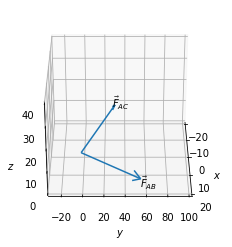

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from draw_functions import calculate_force_components, draw_3d_arrow
import numpy as np

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points = {
    'A': np.array([2, -3, 3]),
    'B': np.array([0, 3, 0]),
    'C': np.array([-2, 3, 4])
}

vectors = {
    'AC': {'origin': points['A'], 'directed point': points['C'], 'magnitude': 40},
    'AB': {'origin': points['A'], 'directed point':points['B'], 'magnitude': 70}
}

for label, vector in vectors.items():
    force_vector = calculate_force_components(vector['origin'], vector['directed point'], vector['magnitude'])
    draw_3d_arrow(vector['origin'], force_vector, r'$\vec{F}_{'+label+r'}$', ax)


# Set plot limits
ax.set_xlim([-20, 20])
ax.set_ylim([-30, 100])
ax.set_zlim([0, 40])

# Set labels
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

# Set perspective
ax.view_init(elev=30, azim=0)

# Show the plot
plt.show()

In [46]:
position_vector_A = np.array((2,-3,3))
position_vector_B = np.array((0,3,0))
position_vector_C = np.array((-2,3,4))
difference_AB = position_vector_B - position_vector_A
unit_vector_AB = difference_AB / (np.sqrt(difference_AB[0]**2+ difference_AB[1]**2 + difference_AB[2]**2))
difference_AC = position_vector_C - position_vector_A
unit_vector_AC = difference_AC / (np.sqrt(difference_AC[0]**2+ difference_AC[1]**2 + difference_AC[2]**2))
dot_product = np.dot(unit_vector_AB, unit_vector_AC)
theta = round(np.degrees(np.arccos(dot_product)), 1)
print(F'\u03B8 = {theta}\u00B0')

θ = 36.4°
